# Integrals

This notebook includes some exercises to calculate integrals numerically and symbolically in Python. Prepared for EAS Practical Coding and Math course at Georgia Tech.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.integrate as integral

## Numerical derivative

First lets define a function $y = e^{-x} \sin(x^2)$ which is very difficult to analytically integrate

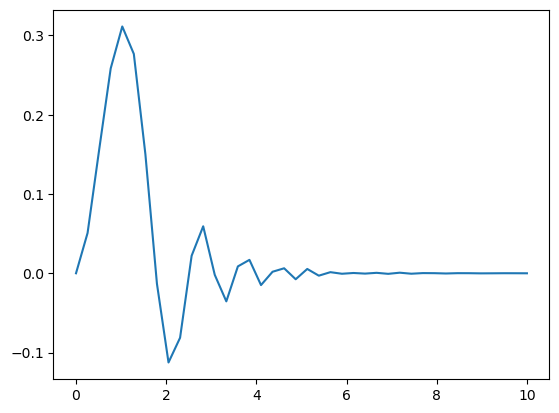

In [2]:
x = np.linspace(0,10,40)
y = np.exp(-x)*np.sin(x**2)
plt.plot(x,y)

Probably the most obvious way to calculate the integral is by summing over y*dx, which uses the conceptual definition of an integral (summing over rectangles under the curve) to calculate the integral numerically

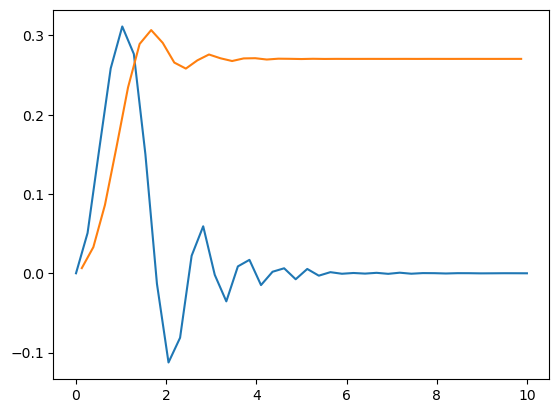

In [3]:
ymid = (y[0:-1]+y[1:])/2 #ymid is the midpoint value of y on each interval (rectangle)
dx = np.diff(x,1)
inty = np.cumsum(ymid * dx) #cumsum calculates the cumulative sum over a vector 

xmid = (x[0:-1]+x[1:])/2
plt.plot(x,y)
plt.plot(xmid,inty) #note that we need to modify x which has one more element than dydx

Scipy also has a built in function to calculate numerical integrals using a variety of techniques (that are generally more accurate than the midpoint method used above)

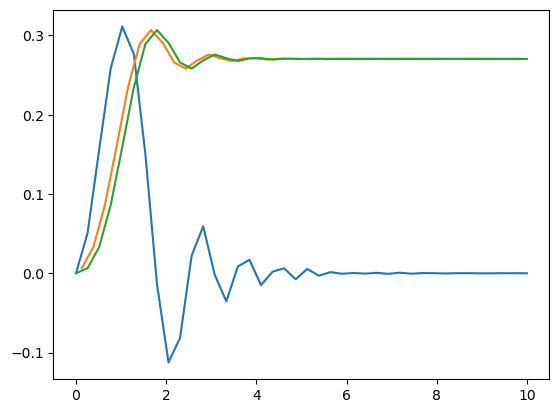

In [4]:
yint = integral.cumtrapz(y, x, initial=0)
yint_double = integral.cumtrapz(yint, x, initial=0)
plt.plot(x,y)
plt.plot(xmid,inty)
plt.plot(x,yint)
#plt.plot(x,yint_double)

## Symbolic Derivatives

To use SymPy, you first must define which variables are "symbols"

In [5]:
x = symbols("x")

Then you can write functions as you would with numerical values in Python

In [7]:
y = exp(-x) * sin(x**2)
y

exp(-x)*sin(x**2)

And use the plotting functionality in SymPy

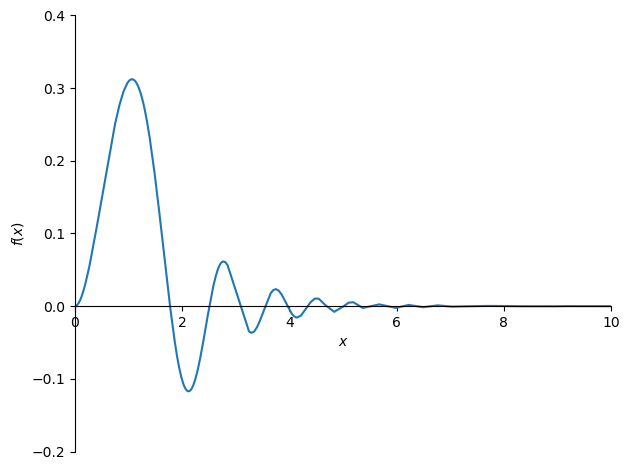

In [8]:
from sympy.plotting import plot
plot(y,xlim=(0,10),ylim=(-0.2,0.4))

In [9]:
yint = integrate(y, x)
yint

Integral(exp(-x)*sin(x**2), x)

We seem to have defeated SymPy (this integral doesn't have a solution). Lets try another one:
$$\int \frac{1}{x^2 + (x-1)^2}$$

In [10]:
y2 = 1/(x**2 + (x-1)**2)
y2

1/(x**2 + (x - 1)**2)

In [11]:
y2int = integrate(y2, x)
y2int

atan(2*x - 1)

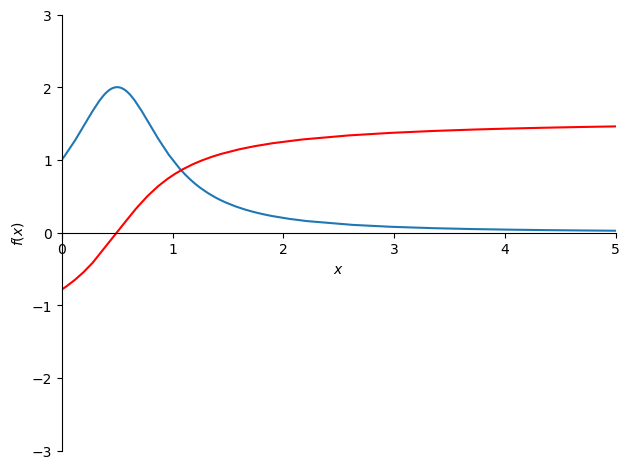

In [14]:
p1=plot(y2,xlim=(0,5),ylim=(-3,3),show=False)
p2=plot(y2int,xlim=(0,5),ylim=(-3,3),show=False,line_color="red")
p1.append(p2[0]) #you have to append plots to each other like this in SymPy
p1.show()